In [86]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df_train = pd.read_csv('../energy/train.csv', encoding='cp949')
df_test = pd.read_csv('../energy/test.csv', encoding='cp949')
submission = pd.read_csv('../energy/sample_submission.csv', encoding='cp949')

In [88]:
print(df_train.shape, df_test.shape)

(122400, 10) (10080, 9)


In [89]:
train = df_train.copy()
test = df_test.copy()

In [90]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00
1,1,2020-06-01 01,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00
2,1,2020-06-01 02,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00
3,1,2020-06-01 03,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00
4,1,2020-06-01 04,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00


In [91]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.30,1.10,78.00,NaN,0.00,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
train.isnull().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [93]:
test.isnull().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
dtype: int64

> -> `test` 데이터 결측치 확인

In [94]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.30,1.10,78.00,NaN,0.00,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# 한글 열 이름 변경
cols = ["num", "date_time", "energy", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]
cols2 = ["num", "date_time", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]

train.columns = cols
test.columns = cols2

In [96]:
train.columns

Index(['num', 'date_time', 'energy', 'temp', 'windspeed', 'humidity',
       'precipitation', 'sun', 'cooler', 'solar'],
      dtype='object')

In [97]:
test.columns

Index(['num', 'date_time', 'temp', 'windspeed', 'humidity', 'precipitation',
       'sun', 'cooler', 'solar'],
      dtype='object')

> 잘 바뀜을 확인

In [98]:
# 수치 데이터 결측치 보간하기
test[["temp", "windspeed", "humidity", "precipitation", "sun"]] = test[["temp", "windspeed", "humidity", "precipitation", "sun"]].interpolate(method="values")
pd.options.display.float_format = '{:.2f}'.format
test.head(10)

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,NaN,NaN
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,NaN,NaN
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,NaN,NaN
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,NaN,NaN
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,NaN,NaN
5,1,2020-08-25 05,26.50,1.23,81.33,0.00,0.00,NaN,NaN
6,1,2020-08-25 06,26.10,1.30,83.00,0.00,0.00,NaN,NaN
7,1,2020-08-25 07,27.00,1.27,81.00,0.00,0.37,NaN,NaN
8,1,2020-08-25 08,27.90,1.23,79.00,0.00,0.73,NaN,NaN
9,1,2020-08-25 09,28.80,1.20,77.00,0.00,1.10,NaN,NaN


In [99]:
test.isnull().sum()

num                 0
date_time           0
temp                0
windspeed           0
humidity            0
precipitation       0
sun                 0
cooler           7784
solar            8456
dtype: int64

> -> 결측치 linear하게 잘 보간됨을 확인

In [100]:
test["cooler"].nunique(), test["solar"].nunique()

(1, 1)

> -> `cooler`와 `solar`가 0인 값이 `NAN`라고 판단

In [101]:
test = test.fillna(0)

In [102]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,0.00,0.00
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,0.00,0.00
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,0.00,0.00
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,0.00,0.00
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,0.00,0.00


In [103]:
test.isnull().sum()

num              0
date_time        0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

> - 결측치 전부 메꿈!

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            122400 non-null  int64  
 1   date_time      122400 non-null  object 
 2   energy         122400 non-null  float64
 3   temp           122400 non-null  float64
 4   windspeed      122400 non-null  float64
 5   humidity       122400 non-null  float64
 6   precipitation  122400 non-null  float64
 7   sun            122400 non-null  float64
 8   cooler         122400 non-null  float64
 9   solar          122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [105]:
# date_time을 datetime으로 변환해주기

train["date_time"] = pd.to_datetime(train["date_time"])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date_time      122400 non-null  datetime64[ns]
 2   energy         122400 non-null  float64       
 3   temp           122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sun            122400 non-null  float64       
 8   cooler         122400 non-null  float64       
 9   solar          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [106]:
train["date"] = train["date_time"].dt.date # 전체 날짜
train["month"] = train["date_time"].dt.month # 월
train["day"] = train["date_time"].dt.day # 일
train["hour"] = train["date_time"].dt.hour
train["weekday"] = train["date_time"].dt.weekday # 0: 월요일
train["weekend"] = train["weekday"].isin([5, 6]).astype(int) # 5: 토요일

train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0


In [107]:
# test set에 대해서도 똑같이
test["date_time"] = pd.to_datetime(test["date_time"])

In [108]:
test["date"] = test["date_time"].dt.date # 전체 날짜
test["month"] = test["date_time"].dt.month # 월
test["day"] = test["date_time"].dt.day # 일
test["hour"] = test["date_time"].dt.hour
test["weekday"] = test["date_time"].dt.weekday # 0: 월요일
test["weekend"] = test["weekday"].isin([5, 6]).astype(int) # 5: 토요일

test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-08-25 00:00:00,27.80,1.50,74.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,0,1,0
1,1,2020-08-25 01:00:00,27.63,1.37,75.33,0.00,0.00,0.00,0.00,2020-08-25,8,25,1,1,0
2,1,2020-08-25 02:00:00,27.47,1.23,76.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,2,1,0
3,1,2020-08-25 03:00:00,27.30,1.10,78.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,3,1,0
4,1,2020-08-25 04:00:00,26.90,1.17,79.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,4,1,0


***

### cooler, solor, cdh + 불쾌지수(THI), 체감온도(sensible)
### - cdh, THI, sensible 열 생성

#### 🥕 CDH (Cooling Degree Hour, 냉방도일)
- `도일(degree day)`: 외부 기온과 실내 기온의 차와 이에 따라 소요되는 연료 소비를 고려한 기후 수치
- `냉방도일(Cooling Degree Day)`: '일평균기온 > 기존 온도'인 날들의 `일평균기온 - 기준 온도와`를 구해 매일 누적 합산한 것
    - 기준 온도는 24˚C가 사용되는 예가 많은데 이 예제에선 26˚C로 적용
> ❓ 같이 얘기해봅시다

- 여기선 `Day`가 아닌 `Hour`로 각 시간별 온도와 기준 온도의 차를 적산하였다.

In [109]:
# cdh feature 추가

def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11: # 이렇게 나눈 의미?
            ys.append(np.sum(xs[:(i+1)] - 26))
        else:
            ys.append(np.sum(xs[(i-1): (i+1)] - 26))
    return np.array(ys)

In [110]:
new_train = train.copy()
new_test = test.copy()

In [111]:
def make_CDH(df):
    cdh_str = np.array([])
    for num in range(1, 61):
        temp = df[df["num"] == num]
        cdh = CDH(temp["temp"].values)
        cdh_str = np.concatenate([cdh_str, cdh])
    return cdh_str

# CDH 열 생성
new_train["CDH"] = make_CDH(new_train)
new_test["CDH"] = make_CDH(new_test)

In [112]:
# 불쾌지수 열 생성
new_train['THI'] = 9/5*new_train['temp'] - 0.55*(1-new_train['humidity']/100)*(9/5*new_train['temp']-26)+32
new_test['THI'] = 9/5*new_test['temp'] - 0.55*(1-new_test['humidity']/100)*(9/5*new_test['temp']-26)+32


# 체감온도 열 생성
new_train['sensible'] = 13.12 + 0.6215*new_train['temp'] - 11.37*new_train['windspeed'] + 0.3965*new_train['windspeed']*new_train['temp']
new_test['sensible'] = 13.12 + 0.6215*new_test['temp'] - 11.37*new_test['windspeed'] + 0.3965*new_test['windspeed']*new_test['temp']

new_train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0,-8.40,63.43,13.08
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0,-16.70,63.57,11.50
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0,-25.20,63.23,9.82
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0,-34.10,62.54,9.06
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0,-43.10,62.40,8.41


### Clustering building based on median enrgy usage of each hour and weekday

In [113]:
# 건물, 요일을 기준으로 전력량의 median에 대한 데이터프레임
by_weekday = train.groupby(['num', 'weekday'])["energy"].median().reset_index()
by_weekday = by_weekday.pivot('num', 'weekday', 'energy').reset_index()

# 건물, 시간을 기준으로 전력량의 median에 대한 데이터프레임
by_hour = train.groupby(['num', 'hour'])["energy"].median().reset_index()
by_hour = by_hour.pivot("num", "hour", "energy").reset_index().drop('num', axis=1)

> - `reset_index()`: num을 컬럼으로 빼기 위해
> - `pivot(a, b, c)`: a는 행, b는 열, c는 각 데이터 값들

In [114]:
by_weekday.head()

weekday,num,0,1,2,3,4,5,6
0,1,8565.59,8552.63,8567.21,8574.34,8563.00,8535.78,8521.52
1,2,1261.01,1304.10,1303.78,1318.36,1300.05,1074.55,1056.73
2,3,3369.36,3351.83,3381.48,3382.67,3374.50,3260.74,3250.80
3,4,538.49,547.99,554.26,582.98,612.36,602.64,608.26
4,5,2761.99,2732.18,2730.24,2650.75,2880.79,2747.74,2585.95


In [115]:
by_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,8546.47,8526.38,8515.37,8505.00,8498.52,8458.34,8458.34,8480.38,8501.11,8541.94,...,8600.26,8607.38,8606.09,8598.96,8576.28,8586.00,8573.69,8577.58,8577.58,8558.78
1,1008.29,1001.16,993.71,987.88,983.99,991.44,1111.64,1318.36,1612.87,1711.37,...,1707.48,1697.11,1693.22,1622.27,1367.28,1204.96,1124.60,1078.92,1039.07,1021.25
2,3274.88,3272.40,3262.90,3276.29,3291.30,3293.24,3320.78,3341.20,3363.12,3373.38,...,3388.34,3385.15,3406.21,3394.87,3334.18,3295.51,3290.76,3283.52,3283.74,3327.59
3,372.82,355.10,344.30,335.23,309.31,309.31,308.02,324.86,647.57,899.86,...,1294.70,1288.22,1236.38,1121.47,917.57,748.22,566.35,479.52,405.22,422.50
4,2999.81,2920.32,2919.89,2912.98,2890.08,2407.10,2198.88,2095.20,2386.80,2557.01,...,2630.88,2667.60,2584.22,2552.26,2344.90,2788.99,3132.00,3111.70,3091.82,3013.20


In [116]:
len(by_weekday.columns), len(by_hour.columns)

(8, 24)

In [117]:
df = pd.concat([by_weekday, by_hour], axis=1) # 열 방향으로 합치기
columns = ["num"] + ["day" + str(i) for i in range(7)] + ["hour" + str(i) for i in range(24)]
df.columns = columns

# 건물 & 요일, 시간 별 전력량 median 데이터프레임
df.head()

,num,day0,day1,day2,day3,day4,day5,day6,hour0,hour1,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,1,8565.59,8552.63,8567.21,8574.34,8563.00,8535.78,8521.52,8546.47,8526.38,...,8600.26,8607.38,8606.09,8598.96,8576.28,8586.00,8573.69,8577.58,8577.58,8558.78
1,2,1261.01,1304.10,1303.78,1318.36,1300.05,1074.55,1056.73,1008.29,1001.16,...,1707.48,1697.11,1693.22,1622.27,1367.28,1204.96,1124.60,1078.92,1039.07,1021.25
2,3,3369.36,3351.83,3381.48,3382.67,3374.50,3260.74,3250.80,3274.88,3272.40,...,3388.34,3385.15,3406.21,3394.87,3334.18,3295.51,3290.76,3283.52,3283.74,3327.59
3,4,538.49,547.99,554.26,582.98,612.36,602.64,608.26,372.82,355.10,...,1294.70,1288.22,1236.38,1121.47,917.57,748.22,566.35,479.52,405.22,422.50
4,5,2761.99,2732.18,2730.24,2650.75,2880.79,2747.74,2585.95,2999.81,2920.32,...,2630.88,2667.60,2584.22,2552.26,2344.90,2788.99,3132.00,3111.70,3091.82,3013.20


In [118]:
# 전력 샤용량이 아닌 '요일과 시간대에 따른 전력 사용량의 경향성'에 따라 군집화할 것이기 떄문에
# 특수한 scaling 도입

for i in range(len(df)):
    # 요일별 전력 중앙값에 대해 normal scaling
    df.iloc[i, 1:8] = (df.iloc[i, 1:8] - df.iloc[i, 1:8].mean()) / df.iloc[i, 1:8].std()
    
    # 시간대별 전력 중앙값에 대해 normal scaling
    df.iloc[i, 8:] = (df.iloc[i, 8:] - df.iloc[i, 8:].mean()) / df.iloc[i, 8:].std()

> `DataFrame.iloc[a, b]`: (a, b) 위치의 데이터 출력

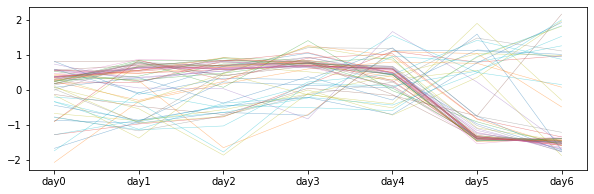

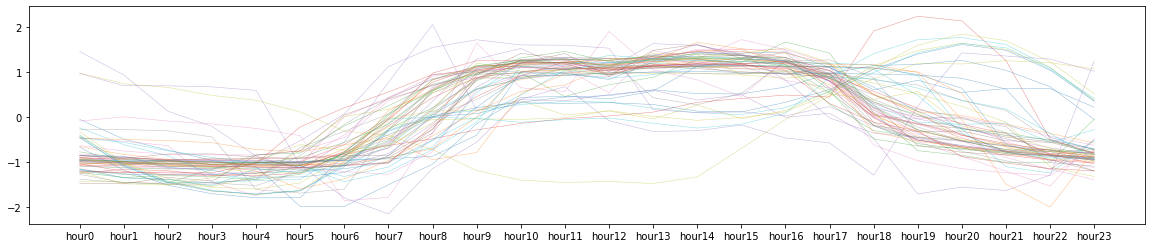

In [119]:
# Visualization

# 요일에 따른 건물별 전력량
fig = plt.figure(figsize=(10, 3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 1:8], alpha=0.5, linewidth=0.5)

# 시간에 따른 건물별 전력량
fig = plt.figure(figsize=(20, 4))
for i in range(len(df)):
    plt.plot(df.iloc[i, 8:], alpha=0.5, linewidth=0.5)

### K-means Clustering
> ❓ 클러스터링 기법 중 왜 K-means Clustering을 선택했는지 고려해봐야 할 것 같다.


**`elbow method`**를 통해 최적의 클러스터 개수 결정
> - K-means 클러스터링은 클러스터 내 오차제곱합(SSE)의 값이 최소가 되도록 클러스터의 중심을 결정하는데, 클러스터의 개수를 늘려가며 SSE 값을 그래프로 그려본다.
> - 이 그래프 모양에서 팔꿈치에 해당하는 부분이 우리가 구하고자 하는 최적의 클러스터 개수이다.

> ❓ 실루엣 기법과의 차이. 왜 elbow method를 사용했는지 이유

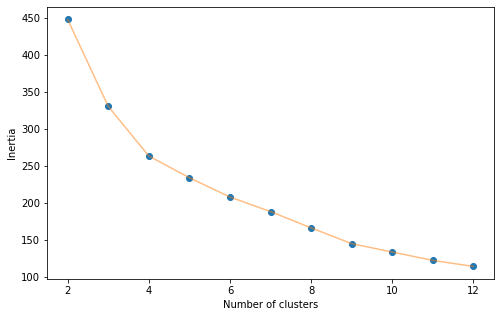

In [120]:
from sklearn.cluster import KMeans

def elbow_method(n_clusters, data):
    SSE = [] # sum of squared distance
    
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        SSE.append(kmeans.inertia_) # 계산된 SSE값
    
    plt.figure(1, figsize=(8, 5))
    plt.plot(n_clusters, SSE, 'o')
    plt.plot(n_clusters, SSE, '-', alpha=0.5)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")


elbow_method([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df.iloc[:, 1:]) # num열 제외 모든 데이터

> - 위 함수에서 `kmeans.inertia_`: k-means 클러스터링으로 계산된 SSE값

> - 최적의 클러스터 개수로 k=4 설정
>> ❓ 이는 반복 작업으로 확인해봐야 할 것 같다.

In [121]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_cls = kmeans.fit_predict(df.iloc[:, 1:])

In [122]:
df_clust = df.copy()
df_clust["kmeans_cls"] = kmeans_cls # cluster 열 추가
df_clust["kmeans_cls"] = df_clust["kmeans_cls"].map({0:1, 1:3, 2:2, 3:0}) # Why?

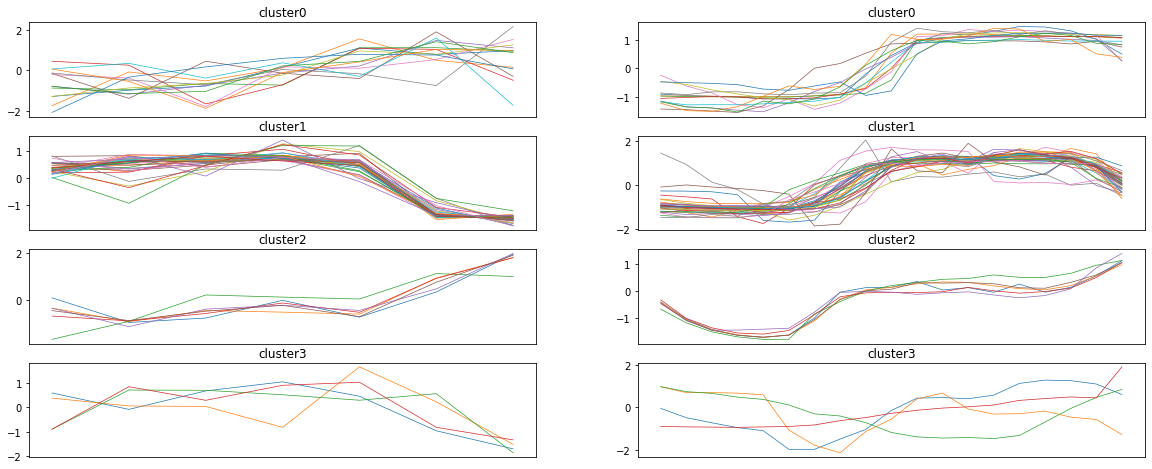

In [123]:
# K-means clustering 시각화
n_cls = df_clust["kmeans_cls"].nunique()

fig = plt.figure(figsize=(20, 8))
for c in range(n_cls):
    temp = df_clust[df_clust["kmeans_cls"] == c]

    plt.subplot(n_cls, 2, 2*c+1) # 왼쪽
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 1:8], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xticks([])
    
    plt.subplot(n_cls, 2, 2*c+2) # 오른쪽
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 8:-6], linewidth=0.7) # 18시까지만 시각화
        plt.title(f'cluster{c}')
        plt.xticks([])

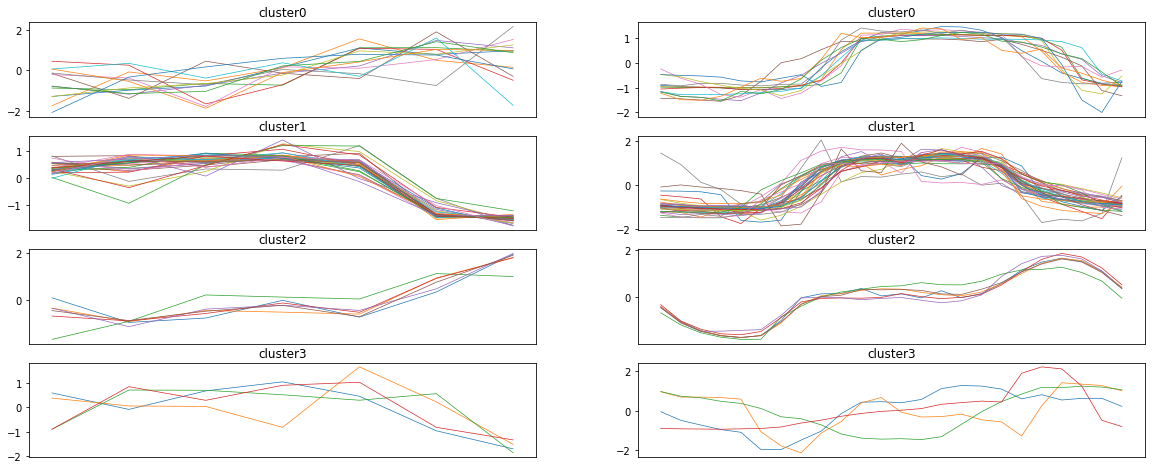

In [124]:
# hour24까지 시각화한 그래프
n_cls = df_clust["kmeans_cls"].nunique()

fig = plt.figure(figsize=(20, 8))
for c in range(n_cls):
    temp = df_clust[df_clust["kmeans_cls"] == c]
    
    plt.subplot(n_cls, 2, 2*c+1)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 1:8], linewidth=0.7, )
        plt.title(f'cluster{c}')
        plt.xticks([])

    plt.subplot(n_cls, 2, 2*c+2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 8:-1], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xticks([])

In [125]:
new_train = new_train.merge(df_clust[["num", "kmeans_cls"]], on="num", how="left")
new_train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible,kmeans_cls
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0,-8.40,63.43,13.08,3
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0,-16.70,63.57,11.50,3
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0,-25.20,63.23,9.82,3
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0,-34.10,62.54,9.06,3
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0,-43.10,62.40,8.41,3


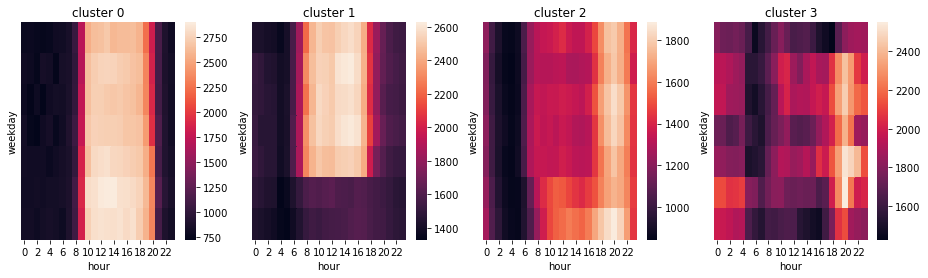

In [126]:
fig = plt.figure(figsize=(20, 4))

for c in range(n_cls):
    temp = new_train[new_train["kmeans_cls"] == c]
    temp = temp.groupby(["weekday", "hour"])["energy"].median().reset_index().pivot("weekday", "hour", "energy")
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f'cluster {c}')
    plt.yticks([])

- `cluster 0`
    - 매일 8-20시에 전력 소모량이 큼. 늘 전력을 소비하는 식당, 카페, 상점, 대형 복합 쇼핑몰이라고 추정.
- `cluster 1`
    - 평일 8-20시에 전력 소모량이 많고, 주말에 전력 소모량이 작음. 일반 회사라고 추정
- `cluster 2`
    - 매일 저녁 16-22시에 전력 소모량이 큼. 밤에 운영되는 유흥시점이라 판단
- `cluster 3`
    - 오전보단 오후나 저녁으로 갈수록 전력 소모량이 커짐.

In [127]:
df_0 = new_train[new_train["kmeans_cls"] == 0]
df_1 = new_train[new_train["kmeans_cls"] == 1]
df_2 = new_train[new_train["kmeans_cls"] == 2]
df_3 = new_train[new_train["kmeans_cls"] == 3]

### 새로 만든 CDH, THI, sensible과 전력 사용량의 상관관계

<AxesSubplot:>

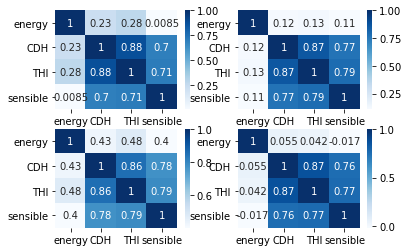

In [215]:
df_0_new = df_0[["energy", "CDH", "THI", "sensible"]]
df_1_new = df_1[["energy", "CDH", "THI", "sensible"]]
df_2_new = df_2[["energy", "CDH", "THI", "sensible"]]
df_3_new = df_3[["energy", "CDH", "THI", "sensible"]]

fig = plt.figure()

plt.subplot(2, 2, 1)
sns.heatmap(df_0_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 2)
sns.heatmap(df_1_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 3)
sns.heatmap(df_2_new.corr(), cmap="Blues", annot=True)

plt.subplot(2, 2, 4)
sns.heatmap(df_3_new.corr(), cmap="Blues", annot=True)

> 전력량은 `CDH`, `THI`, `sensible`과 큰 관련이 없어보인다.
> - 그나마 cluster2에서 좀 높은듯
> - ❓ 다르게 시각화 고려해보기

### Cooler 따른 전력 사용량 그래프 그리기
- 가설: Cooler가 있는 건물은 전력 사용량이 작을 것 같다.

In [268]:
print(df_0.groupby("cooler")["energy"].sum(), '\n')
print(df_1.groupby("cooler")["energy"].sum(), '\n')
print(df_2.groupby("cooler")["energy"].sum(), '\n')
print(df_3.groupby("cooler")["energy"].sum())

cooler
0.00    8866316.67
1.00   48692482.05
Name: energy, dtype: float64 

cooler
0.00    27474291.88
1.00   156060348.61
Name: energy, dtype: float64 

cooler
0.00   16098739.43
Name: energy, dtype: float64 

cooler
0.00   19992323.07
1.00    7374796.28
Name: energy, dtype: float64


In [288]:
# cooler 설치 여부에 따른 전력량 그래프

cooler_0 = pd.DataFrame(df_0.groupby("cooler")["energy"].sum())
cooler_1 = pd.DataFrame(df_1.groupby("cooler")["energy"].sum())
cooler_2 = pd.DataFrame(df_2.groupby("cooler")["energy"].sum())
cooler_3 = pd.DataFrame(df_3.groupby("cooler")["energy"].sum())

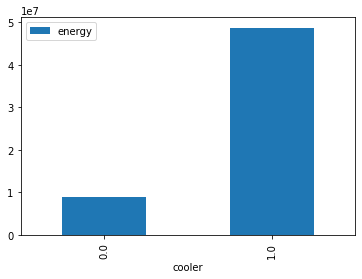

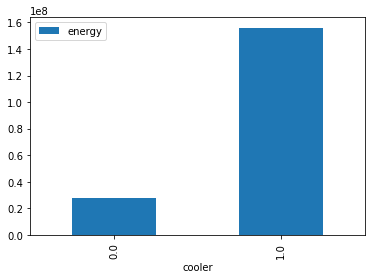

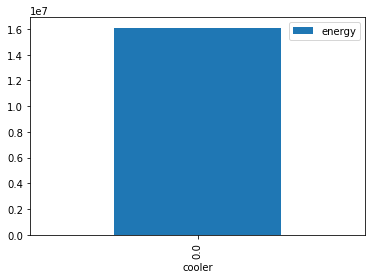

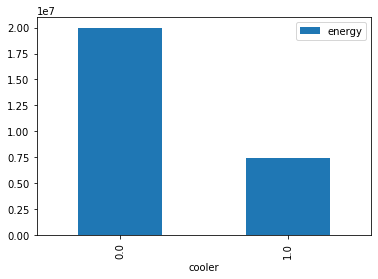

In [298]:
# 수정 필요 !!

cooler_0.plot(kind='bar')
# plt.show()
cooler_1.plot(kind='bar')
# plt.show()
cooler_2.plot(kind='bar')
# plt.show()
cooler_3.plot(kind='bar')
plt.show()

- `cluser 0`, `cluser_1`엔 cooler가 있는 건물들의 전력 소모량이 크고,
    - 일반 회사, 상가 등
- `cluster 2`에는 cooler가 없다.
    - 밤에 전력 소모량이 큰 건물들
- `cluser_3`에는 cooler가 없는 건물들의 전력 소모량이 크다.
    - 오전, 오후에 전력 소모량 커지는 거물들

### Solar 따른 전력 사용량 그래프 그리기
- 가설: Solar가 있는 건물은 전력 사용량이 작을 것이다.

In [299]:
print(df_0.groupby("solar")["energy"].sum(), '\n')
print(df_1.groupby("solar")["energy"].sum(), '\n')
print(df_2.groupby("solar")["energy"].sum(), '\n')
print(df_3.groupby("solar")["energy"].sum())

solar
0.00   18910550.70
1.00   38648248.01
Name: energy, dtype: float64 

solar
0.00    81263686.51
1.00   102270953.97
Name: energy, dtype: float64 

solar
0.00   9229788.12
1.00   6868951.31
Name: energy, dtype: float64 

solar
0.00   22965877.69
1.00    4401241.66
Name: energy, dtype: float64


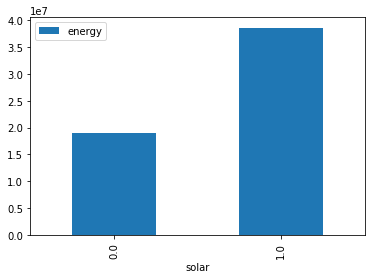

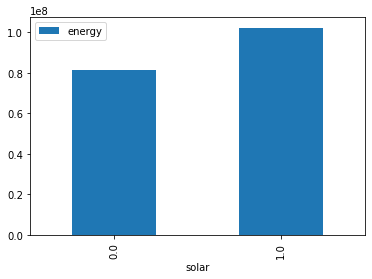

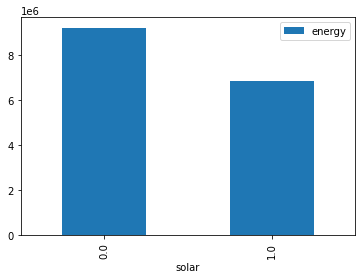

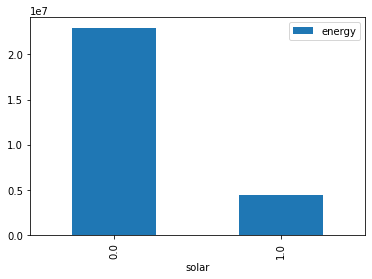

In [301]:
# cooler 설치 여부에 따른 전력량 그래프

solar_0 = pd.DataFrame(df_0.groupby("solar")["energy"].sum())
solar_1 = pd.DataFrame(df_1.groupby("solar")["energy"].sum())
solar_2 = pd.DataFrame(df_2.groupby("solar")["energy"].sum())
solar_3 = pd.DataFrame(df_3.groupby("solar")["energy"].sum())

# 수정 필요 !!

solar_0.plot(kind='bar')
# plt.show()
solar_1.plot(kind='bar')
# plt.show()
solar_2.plot(kind='bar')
# plt.show()
solar_3.plot(kind='bar')
plt.show()

- `cluster 2`, `cluster 3`은 solar가 설치된 경우 전력 소모량이 낮지만
- `cluster 0`, `cluster 1`은 solar가 설치된 경우 전력 소모량이 높다.
> ❓ why?

***

In [178]:
# solar 설치한 건물들
solar_df = new_train[new_train["solar"] == 1]

In [181]:
# solar 설치한 건물들의 강수량, 전력량 평균
solar_df = solar_df.groupby(["num", "weekend", "date"])[["precipitation", "energy"]].mean().reset_index()
solar_df["pre1b"] = solar_df["precipitation"].shift(1)
solar_df["pre2b"] = solar_df["precipitation"].shift(2)
solar_df["pre3b"] = solar_df["precipitation"].shift(3)

solar_df["pre1c"] = solar_df["precipitation"] + solar_df["pre1b"]
solar_df["pre2c"] = solar_df["precipitation"] + solar_df["pre1b"] + solar_df["pre2b"]
solar_df["pre3c"] = solar_df["precipitation"] + solar_df["pre1b"] + solar_df["pre2b"] + solar_df["pre3b"]

solar_df.head()

,num,weekend,date,precipitation,energy,pre1b,pre2b,pre3b,pre1c,pre2c,pre3c
0,3,0,2020-06-01,0.05,3246.30,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,2020-06-02,0.05,3253.40,0.05,NaN,NaN,0.10,NaN,NaN
2,3,0,2020-06-03,0.00,3277.13,0.05,0.05,NaN,0.05,0.10,NaN
3,3,0,2020-06-04,0.01,3281.09,0.00,0.05,0.05,0.02,0.06,0.12
4,3,0,2020-06-05,0.00,3264.17,0.01,0.00,0.05,0.02,0.02,0.07


<Figure size 1080x1800 with 0 Axes>

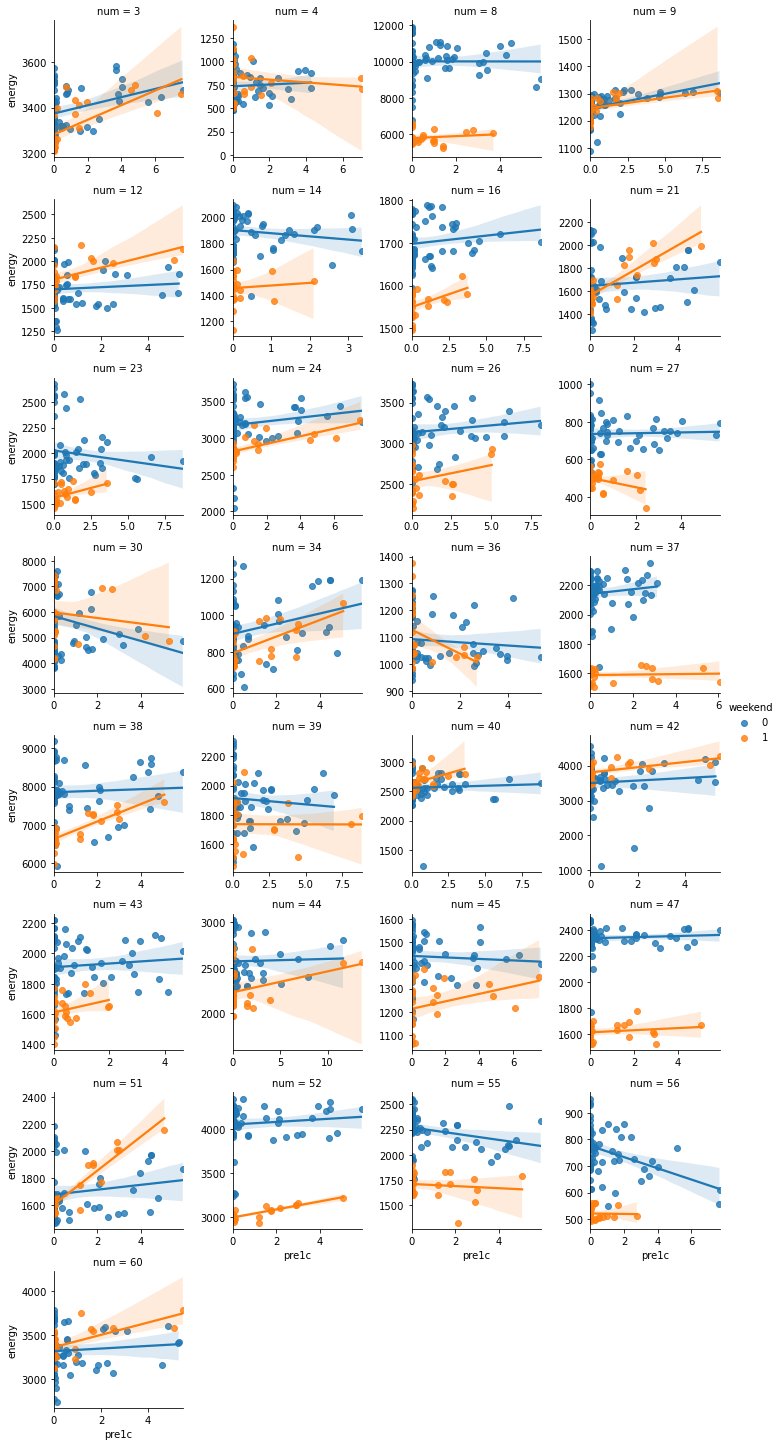

In [186]:
flg = plt.figure(figsize=(15, 25))
sns.lmplot(data=solar_df, x="pre1c", y="energy", hue="weekend", col="num",
          height=2.5, aspect=1, col_wrap=4, sharey=False, sharex=False)

<Figure size 1080x1800 with 0 Axes>

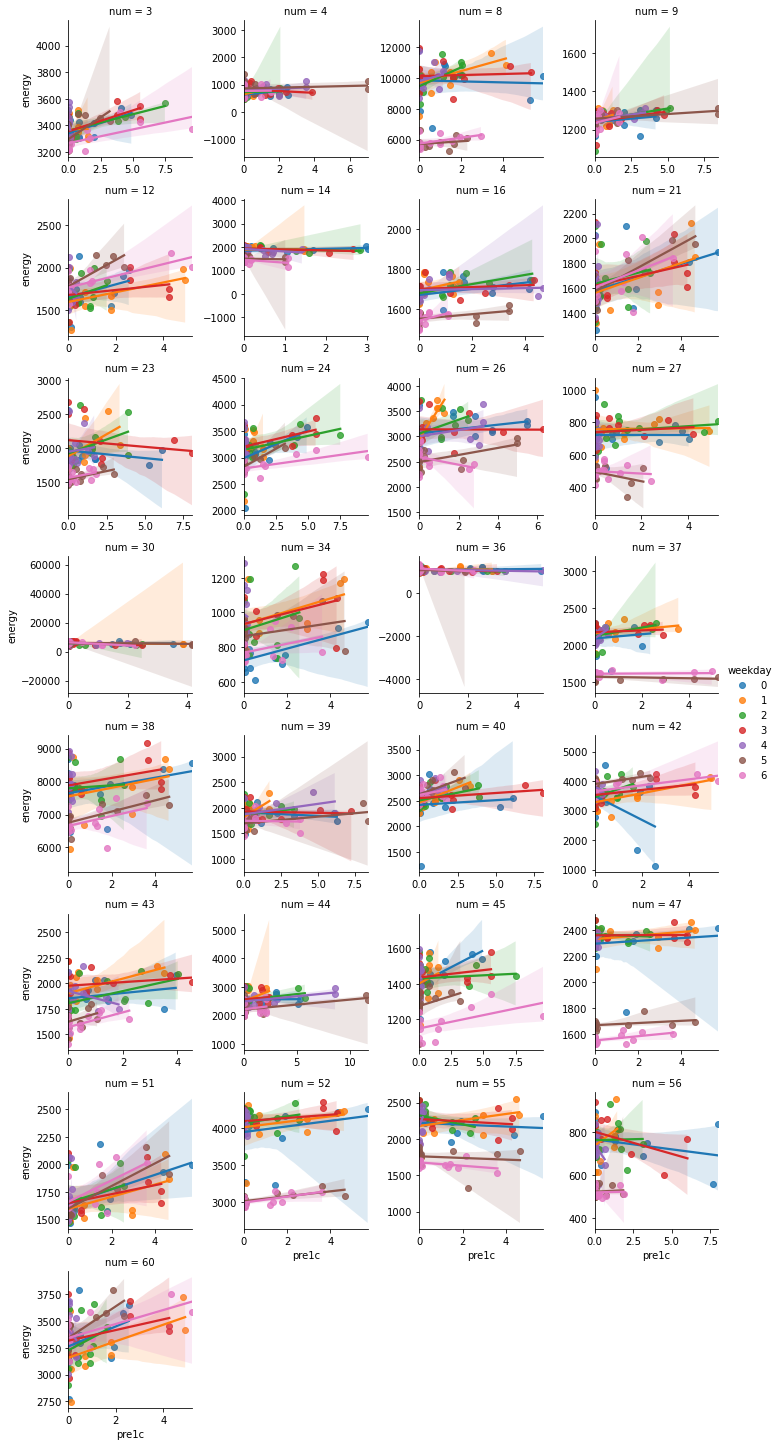

In [188]:
solar_df = new_train[new_train["solar"] == 1]

# solar 설치한 건물들의 강수량, 전력량 평균
solar_df = solar_df.groupby(["num", "weekday", "date"])[["precipitation", "energy"]].mean().reset_index()
solar_df["pre1b"] = solar_df["precipitation"].shift(1)
solar_df["pre2b"] = solar_df["precipitation"].shift(2)
solar_df["pre3b"] = solar_df["precipitation"].shift(3)

solar_df["pre1c"] = solar_df["precipitation"] + solar_df["pre1b"]
solar_df["pre2c"] = solar_df["precipitation"] + solar_df["pre1b"] + solar_df["pre2b"]
solar_df["pre3c"] = solar_df["precipitation"] + solar_df["pre1b"] + solar_df["pre2b"] + solar_df["pre3b"]

solar_df.head()

flg = plt.figure(figsize=(15, 25))
sns.lmplot(data=solar_df, x="pre1c", y="energy", hue="weekday", col="num",
          height=2.5, aspect=1, col_wrap=4, sharey=False, sharex=False)